<a href="https://colab.research.google.com/github/juancarlosmontesdeoca/Proyecto_regresion_regularizada_jcmo/blob/main/Proyecto_Regresion_Regularizada_jcmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regresion Lineal Regularizada**

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from tableone import TableOne
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as MSE

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

Paso 1: Carga del conjunto de datos

In [419]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv"

In [420]:
df = pd.read_csv(url)

Paso 2: Realiza un EDA completo

**Plantamiento del Problema**

Descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.

Para ello, es necesario que establezcas una variable objetivo (relacionada con la salud) para llevar a cabo el análisis.

De revision llevada a cabo al DataFrame tendremos:

Variable Objetivo:
99 – diabetes_prevalence (float64) → Prevalencia de diabetes

Variables Predictoras:

•	0 TOT_POP (int64) → Población total del condado.

•	36 R_NATURAL_INC_2018 (float64) → Crecimiento natural (nacimientos – muertes)

•	46 Percent of adults completing some college or associate's degree 2014-18 (float64) → Porcentaje de adultos con estudios técnicos/universitarios incompletos.

•		58 Unemployment_rate_2018 (float64) → Tasa de desempleo (2018).

•	63 Active Primary Care Physicians per 100000 Population 2018 (AAMC) (float64) → Médicos de atención primaria por cada 100 mil habitantes.

•	106 Urban_rural_code (int64) → Clasificación del área como urbana o rural.



Exploracion de datos y limpieza

In [421]:
df.shape

(3140, 108)

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [423]:
nulos = df.isnull().sum()   #verificando si hay nulos
nulos[nulos>0]

,0


In [424]:
#eliminando columna id
df = df.drop('fips', axis=1)


In [425]:
df.duplicated().sum() #revisando duplicados

np.int64(0)

In [426]:
#Viendo el numero y nombre de la columna, asi como el tipo de dato
for i, column in enumerate(df.columns):
    print(f"{i}: {column} ({df[column].dtype})")


0: TOT_POP (int64)
1: 0-9 (int64)
2: 0-9 y/o % of total pop (float64)
3: 19-Oct (int64)
4: 10-19 y/o % of total pop (float64)
5: 20-29 (int64)
6: 20-29 y/o % of total pop (float64)
7: 30-39 (int64)
8: 30-39 y/o % of total pop (float64)
9: 40-49 (int64)
10: 40-49 y/o % of total pop (float64)
11: 50-59 (int64)
12: 50-59 y/o % of total pop (float64)
13: 60-69 (int64)
14: 60-69 y/o % of total pop (float64)
15: 70-79 (int64)
16: 70-79 y/o % of total pop (float64)
17: 80+ (int64)
18: 80+ y/o % of total pop (float64)
19: White-alone pop (int64)
20: % White-alone (float64)
21: Black-alone pop (int64)
22: % Black-alone (float64)
23: Native American/American Indian-alone pop (int64)
24: % NA/AI-alone (float64)
25: Asian-alone pop (int64)
26: % Asian-alone (float64)
27: Hawaiian/Pacific Islander-alone pop (int64)
28: % Hawaiian/PI-alone (float64)
29: Two or more races pop (int64)
30: % Two or more races (float64)
31: POP_ESTIMATE_2018 (int64)
32: N_POP_CHG_2018 (int64)
33: GQ_ESTIMATES_2018 (int6

In [427]:
#calculando correlacion de todas las variables con respecto a diabetes_number


numeric_columns = df.select_dtypes(include=['int64','float64'])

# Calcular correlaciones de todas las columnas contra diabetes_number
correlations = numeric_columns.corrwith(df["diabetes_number"])

# Tomar valores absolutos
abs_correlations = correlations.abs()

# Mostrar toda la matriz ordenada de mayor a menor
#print(abs_correlations.sort_values(ascending=False))
print(abs_correlations[abs_correlations.isnull()])


numeric_columns = df.select_dtypes(include=['int64','float64'])

# Calcular correlaciones de todas las columnas contra diabetes_number
correlations = numeric_columns.corrwith(df["diabetes_number"])

# Tomar valores absolutos
abs_correlations = correlations.abs()

# Mostrar toda la matriz ordenada de mayor a menor
print(abs_correlations.sort_values(ascending=False))
#print(abs_correlations.isnull().any()) #verificando si habian los nan que salieron antes




Series([], dtype: float64)
diabetes_number                                                   1.000000
CKD_number                                                        0.995536
anycondition_number                                               0.993295
Total Population                                                  0.990328
TOT_POP                                                           0.989583
                                                                    ...   
Percent of adults with less than a high school diploma 2014-18    0.022998
Unemployment_rate_2018                                            0.015113
10-19 y/o % of total pop                                          0.012498
Active General Surgeons per 100000 Population 2018 (AAMC)         0.008777
R_DOMESTIC_MIG_2018                                               0.003577
Length: 105, dtype: float64


In [428]:
#calculando la correlacion de todas las variables contra diabetes_prevalence
#mayores a 0.5 en valor absoluto

numeric_columns = df.select_dtypes(include=['int64','float64'])

correlations_prev = numeric_columns.corrwith(df["diabetes_prevalence"])
abs_correlations_prev = correlations_prev.abs()

corre_mayor_cienta = abs_correlations_prev[abs_correlations_prev > 0.5]
print(f"Correlacion mayor a 0.5\n{corre_mayor_cienta}")


Correlacion mayor a 0.5
R_death_2018                                                      0.539643
Percent of adults with less than a high school diploma 2014-18    0.699251
Percent of adults with a bachelor's degree or higher 2014-18      0.669985
PCTPOVALL_2018                                                    0.735489
PCTPOV017_2018                                                    0.840088
PCTPOV517_2018                                                    0.833527
MEDHHINC_2018                                                     0.723316
CI90LBINC_2018                                                    0.720820
CI90UBINC_2018                                                    0.720364
Median_Household_Income_2018                                      0.723316
Med_HH_Income_Percent_of_State_Total_2018                         0.561531
anycondition_prevalence                                           0.850219
anycondition_Lower 95% CI                                         0.856473
a

In [429]:
#Correlaciones entre 0.20 y 0.50 en valor absoluto
corre_entre_veinteycincuenta = abs_correlations_prev[ (abs_correlations_prev > 0.2) & (abs_correlations_prev < 0.5) ]
print(f"Correlacion entre 0.20 y 0.50\n{corre_entre_veinteycincuenta}")


Correlacion entre 0.20 y 0.50
20-29 y/o % of total pop                                                         0.227002
30-39 y/o % of total pop                                                         0.309565
60-69 y/o % of total pop                                                         0.207141
70-79 y/o % of total pop                                                         0.337031
% White-alone                                                                    0.410392
% Black-alone                                                                    0.474800
% Asian-alone                                                                    0.310418
GQ_ESTIMATES_2018                                                                0.211927
R_NATURAL_INC_2018                                                               0.377873
Bachelor's degree or higher 2014-18                                              0.208333
Percent of adults with a high school diploma only 2014-18             

In [430]:
#Correlaciones menores a 0.2 en valor absoluto

corre_menor_veinte = abs_correlations_prev[ (abs_correlations_prev < 0.2) ]
print(f"Correlacion menor a 0.20\n{corre_menor_veinte}")
print(abs_correlations_prev[abs_correlations_prev.isnull()])

Correlacion menor a 0.20
TOT_POP                                                                   0.174843
0-9                                                                       0.167495
0-9 y/o % of total pop                                                    0.028295
19-Oct                                                                    0.178421
10-19 y/o % of total pop                                                  0.151713
20-29                                                                     0.175033
30-39                                                                     0.170921
40-49                                                                     0.171510
40-49 y/o % of total pop                                                  0.081622
50-59                                                                     0.177161
50-59 y/o % of total pop                                                  0.111055
60-69                                                         

In [431]:
#Quedandome solo con las columnas de interes

cols_interes = [
    "TOT_POP",
    "R_NATURAL_INC_2018",
    "Percent of adults completing some college or associate's degree 2014-18",
    "Unemployment_rate_2018",
    "Active Primary Care Physicians per 100000 Population 2018 (AAMC)",
    "Urban_rural_code",
    "diabetes_prevalence"
]

# Filtrar las correlaciones absolutas ya calculadas
corre_interes_prev = abs_correlations_prev[abs_correlations_prev.index.isin(cols_interes)]

# Ahora tienes en corre_interes_prev solo esas correlaciones
print(corre_interes_prev.sort_values(ascending=False))


diabetes_prevalence                                                        1.000000
Unemployment_rate_2018                                                     0.490972
Active Primary Care Physicians per 100000 Population 2018 (AAMC)           0.387692
R_NATURAL_INC_2018                                                         0.377873
Urban_rural_code                                                           0.339930
Percent of adults completing some college or associate's degree 2014-18    0.304245
TOT_POP                                                                    0.174843
dtype: float64


Todas tienen correlaciones entre 0.49 y 0.17

In [432]:
df_reducido = df[ [
    "TOT_POP",
    "R_NATURAL_INC_2018",
    "Percent of adults completing some college or associate's degree 2014-18",
    "Unemployment_rate_2018",
    "Active Primary Care Physicians per 100000 Population 2018 (AAMC)",
    "Urban_rural_code",
    "diabetes_prevalence"
] ].copy()

In [433]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 7 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   TOT_POP                                                                  3140 non-null   int64  
 1   R_NATURAL_INC_2018                                                       3140 non-null   float64
 2   Percent of adults completing some college or associate's degree 2014-18  3140 non-null   float64
 3   Unemployment_rate_2018                                                   3140 non-null   float64
 4   Active Primary Care Physicians per 100000 Population 2018 (AAMC)         3140 non-null   float64
 5   Urban_rural_code                                                         3140 non-null   int64  
 6   diabetes_prevalence                                                      

In [434]:
#revisando como esta codificada la columna Urban_rural_code
print(f"Columna: Urban_rural_code")
print(df_reducido["Urban_rural_code"].value_counts())


Columna: Urban_rural_code
Urban_rural_code
6    1333
5     641
3     372
2     368
4     358
1      68
Name: count, dtype: int64


Podemos senalar que tenemos las siguientes variables:

categorica:

 "Urban_rural_code" (Aun cuando tiene numeros asociados, cada valor representa un segmento)

numericas:

"TOT_POP","R_NATURAL_INC_2018",
"Percent of adults completing some college or associate's degree 2014-18","Unemployment_rate_2018",
"Active Primary Care Physicians per 100000 Population 2018 (AAMC)",
"diabetes_prevalence"

In [435]:
df_reducido.describe()

,TOT_POP,R_NATURAL_INC_2018,Percent of adults completing some college or associate's degree 2014-18,Unemployment_rate_2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC),Urban_rural_code,diabetes_prevalence
count,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,0.802229,30.729777,4.131338,87.958758,4.635350,13.073503
std,3.335834e+05,4.056710,5.206136,1.503013,12.568023,1.510447,2.724351
min,8.800000e+01,-14.400000,5.800000,0.000000,65.300000,1.000000,6.100000
25%,1.096325e+04,-1.800000,27.300000,3.100000,79.100000,3.000000,11.200000
50%,2.580050e+04,0.500000,30.600000,3.900000,86.600000,5.000000,12.800000
75%,6.791300e+04,3.000000,34.200000,4.800000,95.400000,6.000000,14.800000
max,1.010552e+07,27.800000,57.300000,19.900000,239.700000,6.000000,25.600000


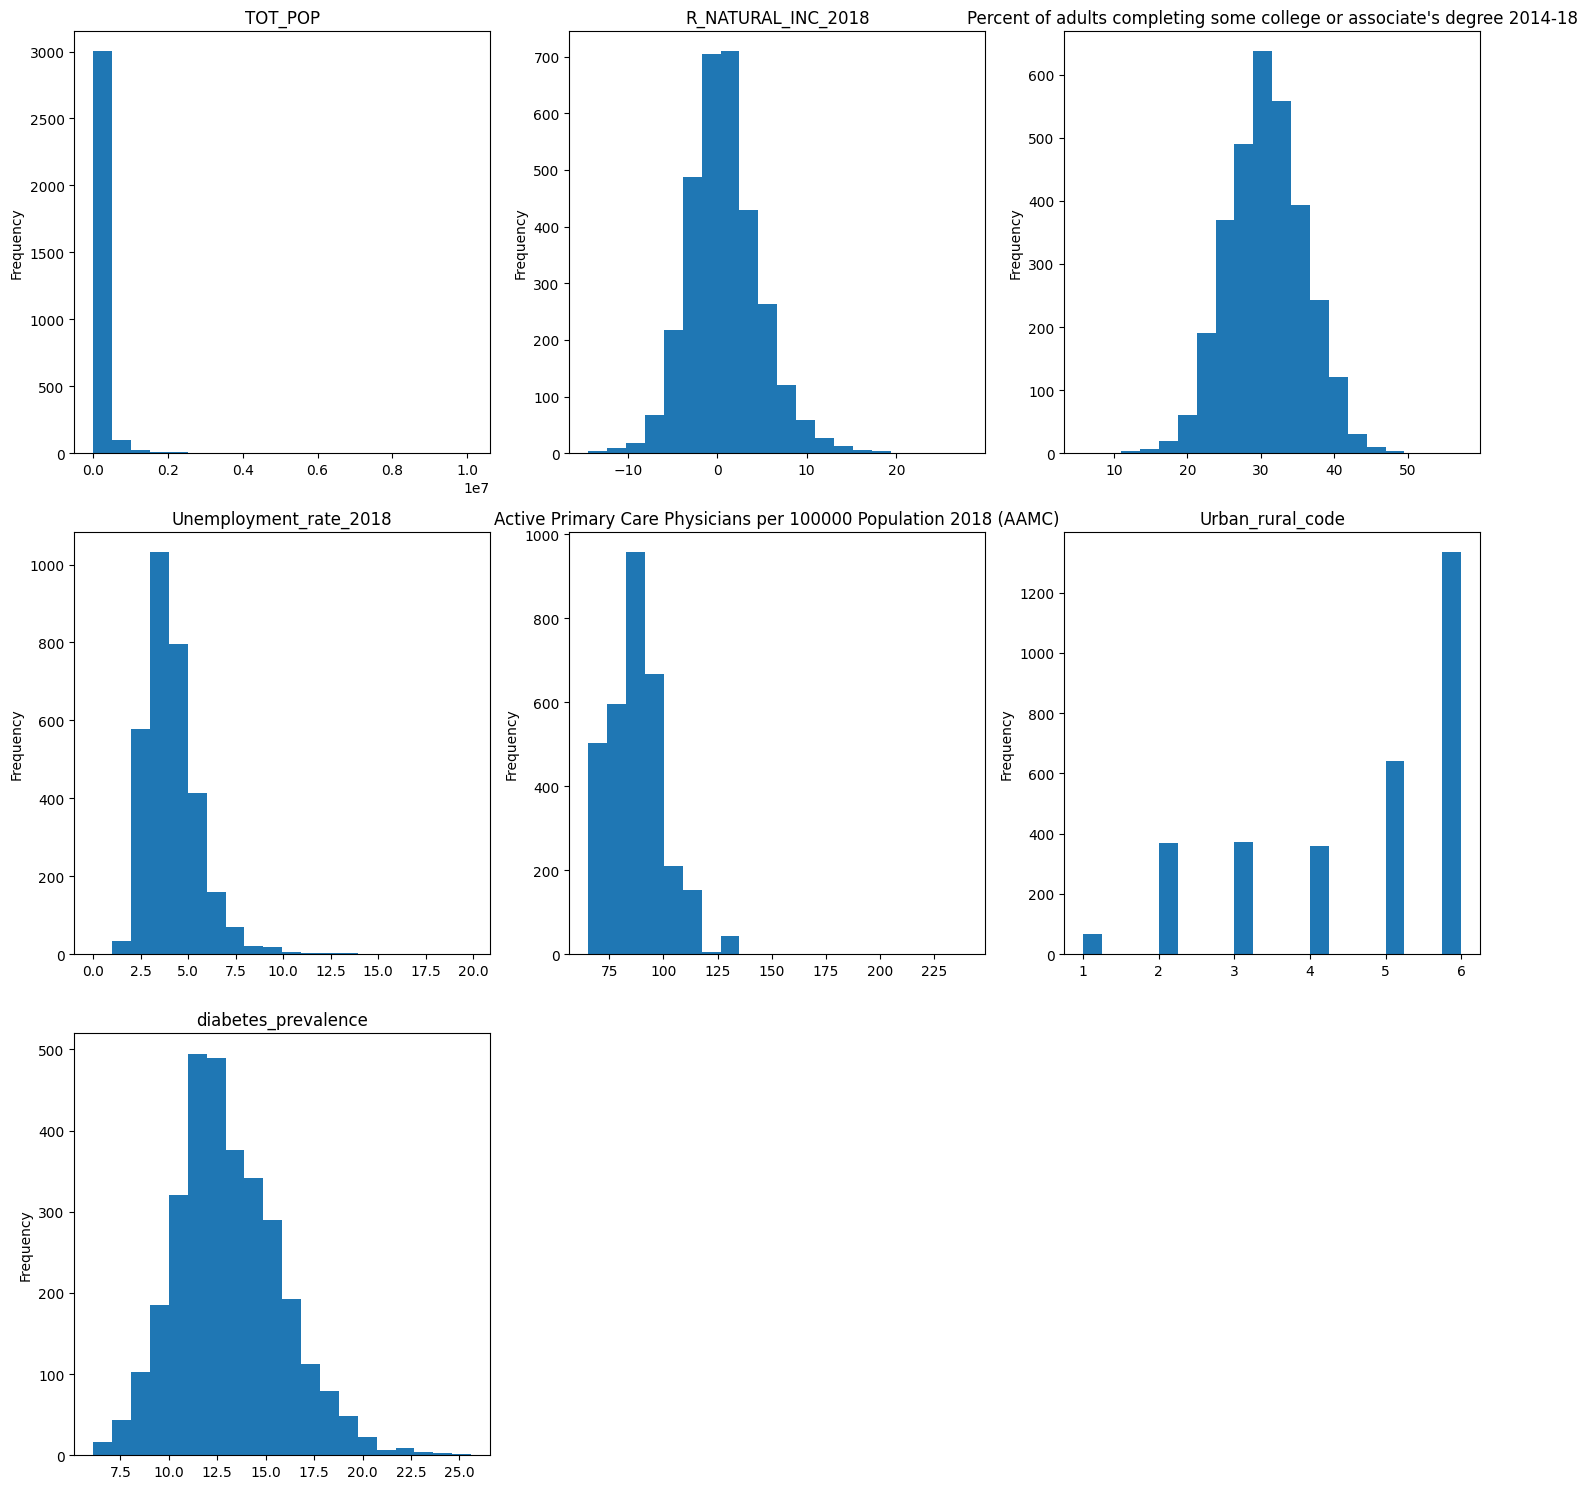

In [436]:
#Graficando como se comportan las variables antes de hacerle los test

import matplotlib.pyplot as plt

ncols = 3
cols = df_reducido.columns
nrows = (len(cols) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))

i = 0
for row in range(nrows):
    for col_axis in range(ncols):
        if i >= len(cols):
            axes[row, col_axis].set_visible(False)  # oculta los sobrantes
        else:
            colname = cols[i]
            if df_reducido[colname].dtype == 'object':
                df_reducido[colname].value_counts().plot(kind='bar', ax=axes[row, col_axis])
            else:
                df_reducido[colname].plot(kind='hist', bins=20, ax=axes[row, col_axis])
            axes[row, col_axis].set_title(colname)
        i += 1

plt.tight_layout()
plt.show()


Observaciones:

Las variables  "R_NATURAL_INC_2018", "Percent of adults completing some college or associate's degree 2014-18" y  "diabetes_prevalence", tienen un comportamiento parecido a una distribucion normal, lo cual verificaremos seguidamente.

Las variables "TOT_POP", "Unemployment_rate_2018" y "Active Primary Care Physicians per 100000 Population 2018 (AAMC)", presentan sesgo a la izquierda.

La variable "Urban_rural_code" es discreta con valores entre 1 y 6, teniendo la barra mas pronunciada en el estrato 6.

In [437]:
#verificando normalidad en las variables usando el test de Shapiro
#no se incluye la variable discreta

columns = [
    "TOT_POP",
    "R_NATURAL_INC_2018",
    "Percent of adults completing some college or associate's degree 2014-18",
    "Unemployment_rate_2018",
    "Active Primary Care Physicians per 100000 Population 2018 (AAMC)",
    "diabetes_prevalence"
]
shapiro_results = {}

for column in columns:
    statistic, p_value = shapiro(df_reducido[column])
    shapiro_results[column] = {'statistic': statistic, 'p_value': p_value}
    print(f'{column},  p-value: {p_value}')

TOT_POP,  p-value: 3.3666654621891736e-77
R_NATURAL_INC_2018,  p-value: 5.407507163955036e-22
Percent of adults completing some college or associate's degree 2014-18,  p-value: 0.00465799266007142
Unemployment_rate_2018,  p-value: 3.562131741347242e-46
Active Primary Care Physicians per 100000 Population 2018 (AAMC),  p-value: 1.4610147180613633e-34
diabetes_prevalence,  p-value: 5.055272719516536e-18


En todos los casos p-value < 0.05. Implica rechazar hipotesis nula y aceptar la alternativa, no existe evidencia en mis datos que las variables estudiadas tengan una distribucion normal, por lo tanto son nonnormal

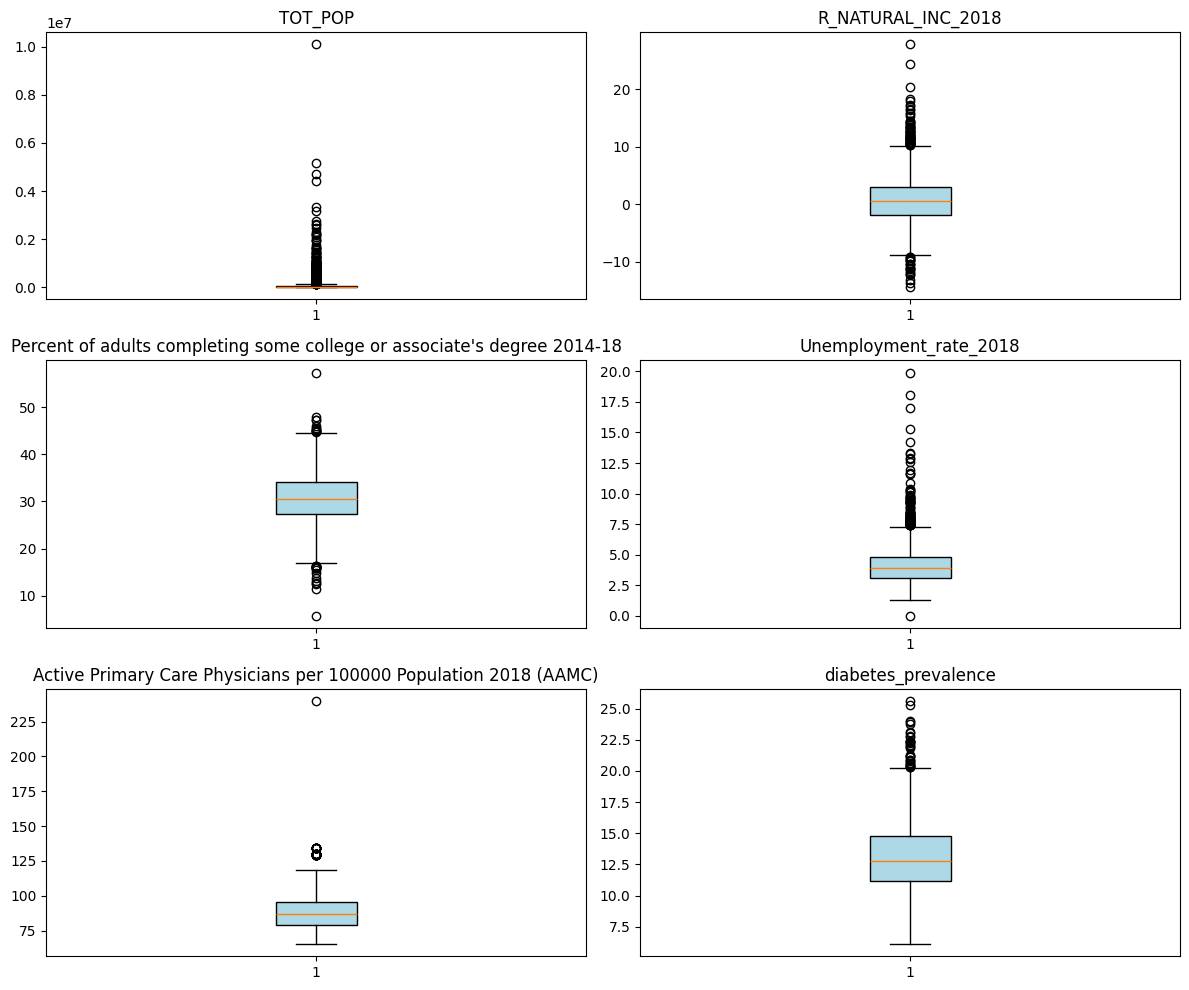

In [438]:
#graficando verificando como se comportan los datos en las variables nonnormales

columns = [
    "TOT_POP",
    "R_NATURAL_INC_2018",
    "Percent of adults completing some college or associate's degree 2014-18",
    "Unemployment_rate_2018",
    "Active Primary Care Physicians per 100000 Population 2018 (AAMC)",
    "diabetes_prevalence"
]

plt.figure(figsize=(12, 10))  # más alto para acomodar varias filas
for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)  # 2 filas, 2 columnas
    plt.boxplot(df_reducido[col],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
    plt.title(col)

plt.tight_layout()
plt.show()


Visualmente se encuentran outliners en todos las variables, excepto en "Active Primary Care Physicians per 100000 Population 2018 (AAMC)" que presenta muy pocos

Realizamos una preevaluacion mediante TableOne para ver cuales variables categoricas son candidatas a incidir en diabetes_prevalence.

In [439]:
#Agrupando por Urban_rural_code
categoricas = ["Urban_rural_code"]
nonnormal = [ "diabetes_prevalence", "TOT_POP",
    "R_NATURAL_INC_2018",
    "Percent of adults completing some college or associate's degree 2014-18",
    "Unemployment_rate_2018",
    "Active Primary Care Physicians per 100000 Population 2018 (AAMC)" ]

tabla =TableOne(df_reducido,
                nonnormal=nonnormal,
                categorical=categoricas,
                groupby="Urban_rural_code",
                pval=True,
                htest_name=True)
display(tabla.tableone)

Grouped by Urban_rural_code  \
                                                                         Missing   
n                                                                                  
TOT_POP, median [Q1,Q3]                                                        0   
R_NATURAL_INC_2018, median [Q1,Q3]                                             0   
Percent of adults completing some college or as...                             0   
Unemployment_rate_2018, median [Q1,Q3]                                         0   
Active Primary Care Physicians per 100000 Popul...                             0   
Urban_rural_code, n (%)                            1                               
                                                   2                               
                                                   3                               
                                                   4                               
                                                   5                               
                                                   6                               
diabetes_prevalence, median [Q1,Q3]                                            0   

                                                                                 \
                                                                        Overall   
n                                                                          3140   
TOT_POP, median [Q1,Q3]                               25800.5 [10963.2,67913.0]   
R_NATURAL_INC_2018, median [Q1,Q3]                               0.5 [-1.8,3.0]   
Percent of adults completing some college or as...             30.6 [27.3,34.2]   
Unemployment_rate_2018, median [Q1,Q3]                            3.9 [3.1,4.8]   
Active Primary Care Physicians per 100000 Popul...             86.6 [79.1,95.4]   
Urban_rural_code, n (%)                            1                   68 (2.2)   
                                                   2                 368 (11.7)   
                                                   3                 372 (11.8)   
                                                   4                 358 (11.4)   
                                                   5                 641 (20.4)   
                                                   6                1333 (42.5)   
diabetes_prevalence, median [Q1,Q3]                            12.8 [11.2,14.8]   

                                                                                     \
                                                                                  1   
n                                                                                68   
TOT_POP, median [Q1,Q3]                               990213.0 [701918.0,1688538.0]   
R_NATURAL_INC_2018, median [Q1,Q3]                                    5.0 [3.4,6.2]   
Percent of adults completing some college or as...                 27.0 [24.1,30.1]   
Unemployment_rate_2018, median [Q1,Q3]                                3.7 [3.3,4.2]   
Active Primary Care Physicians per 100000 Popul...                94.2 [85.9,100.6]   
Urban_rural_code, n (%)                            1                     68 (100.0)   
                                                   2                        0 (0.0)   
                                                   3                        0 (0.0)   
                                                   4                        0 (0.0)   
                                                   5                        0 (0.0)   
                                                   6                        0 (0.0)   
diabetes_prevalence, median [Q1,Q3]                                 11.2 [9.5,12.6]   

                                                                                  \
                                                                               2   
n                                                                       

**Observaciones del Analisis de variables univariante:**

La variable diabetes_prevalence agrupada por la variable Urban_rural_code tiene un pvalue < 0.001 (test Kruskall Wallis), lo que implica que se encontraron en los datos evidencias significativas que la variable Urban_rural_code incide, segun sus estratos, en la variable diabetes_prevalence.

Todas las variables analizadas muestran diferencias significativas entre los grupos de Urban_rural_code (p < 0.001 en todos los casos).

La magnitud de esas diferencias varía: en población y prevalencia de diabetes son muy marcadas, mientras que en desempleo son más sutiles.

En términos prácticos, el código urbano‑rural sí está asociado con variaciones en indicadores demográficos, de salud y socioeconómicos.

Las variables "TOT_POP", "R_NATURAL_INC_2018", "Percent of adults completing some college or associate's degree 2014-18",     "Unemployment_rate_2018", "Active Primary Care Physicians per 100000 Population 2018 (AAMC)" y "diabetes_prevalence", despues de realizar el test de Shapiro, se pudo determinar que no existe evidencia en los datos que indiquen que siguen una distribucion normal, por lo tanto son variables no normales.




**Analsisis de variable bivariante**

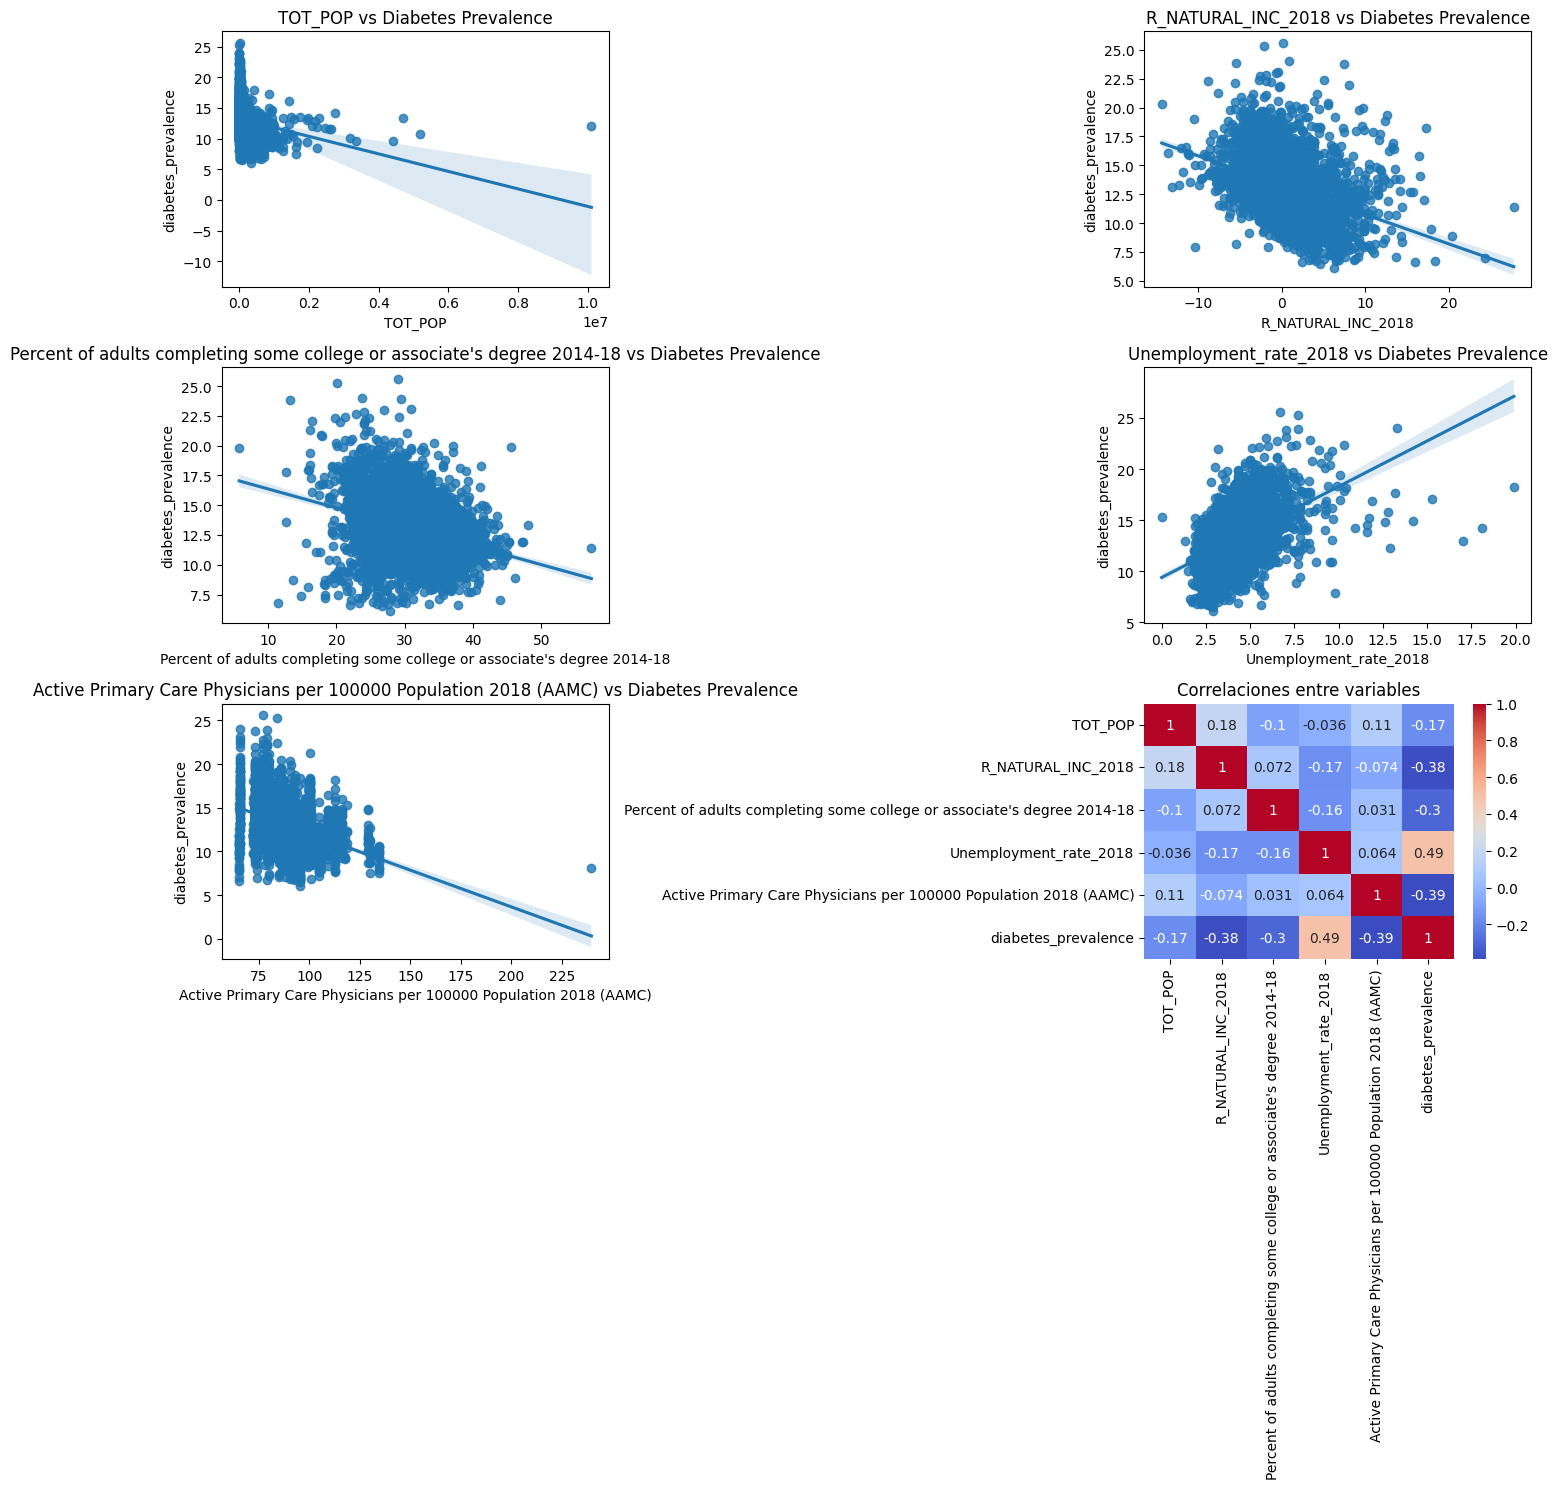

In [440]:
#analisis numerico - numerico
#regplots en líneas

#Lista de variables que quieres comparar con diabetes_prevalence
variables = ["TOT_POP", "R_NATURAL_INC_2018",
             "Percent of adults completing some college or associate's degree 2014-18",
             "Unemployment_rate_2018",
             "Active Primary Care Physicians per 100000 Population 2018 (AAMC)",
             "diabetes_prevalence"]

#Número de variables (menos la propia diabetes_prevalence)
n_vars = len(variables) - 1
n_rows = (n_vars + 1) // 2  # número de filas necesarias

fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5*n_rows))
axes = axes.flatten()


#Generando un regplot para cada variable (excepto la propia diabetes_prevalence)
for i, var in enumerate(variables[:-1]):
    sns.regplot(x=var, y="diabetes_prevalence", data=df_reducido, ax=axes[i])
    axes[i].set_title(f"{var} vs Diabetes Prevalence")

#Último gráfico: heatmap de correlaciones entre todas las variables
sns.heatmap(df_reducido[variables].corr(), annot=True, cmap="coolwarm", ax=axes[-1])
axes[-1].set_title("Correlaciones entre variables")

plt.tight_layout()
plt.show()


La correlacion entre Unemployment_rate_2018 y diabetes_prevalence es de 0.49. Relación positiva de magnitud moderada‑alta. Esto significa que, en general, a mayor tasa de desempleo, mayor prevalencia de diabetes, aunque no implica un cambio exacto de 0.49 unidades por cada unidad de desempleo.

Las variables Active Primary Care Physicians per 100000 Population 2018 (AAMC),R_NATURAL_INC_2018,Percent of adults completing some college or associate's degree 2014-18 presentan correlaciones negativas de magnitud moderada baja entre -0.3 y -0.39. Indican que, en promedio, cuando estas variables aumentan, la prevalencia de diabetes tiende a disminuir, aunque la relación no es fuerte.

La correlacion entre TOT_POP y diabetes_prevalence es de -0.17, tienen una relacion negativa debil.Sugiere que poblaciones más grandes tienden a tener una prevalencia de diabetes ligeramente menor, pero la asociación es muy baja.

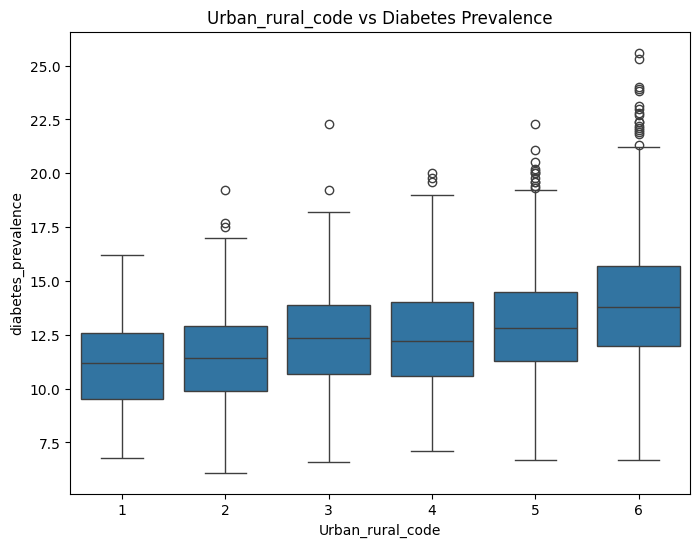

In [441]:
#Analisis categorico-numerico

categorica = df_reducido['Urban_rural_code']

plt.figure(figsize=(8,6))
sns.boxplot(x=categorica, y='diabetes_prevalence', data=df_reducido)
plt.title("Urban_rural_code vs Diabetes Prevalence")
plt.show()


La mediana y el rango intercuartil en los  estratos de Urban_rural_code tienen diferencias, lo que indica que la prevalencia de diabetes cambia segun el nivel urbano - rural.

Hay outliers visiblemente significativos en los estratos 5 y 6, eso sugiere que en esos estratos hay prevalencias muy distintas al promedio.

Lo anterior contrasta con el resultado obtenido con el test de Kruskal - Wallis con un pvalue < 0.001, que confirmaba diferencias estadisticametne significativas.

**Ingenieria de Caracteristicas**

De acuerdo con los analisis realizados en  los apartados univariante y bivariante y viendo que todas las variables seleccionadas no tienen una correlacion fuerte entre ellas, aunado que todas pueden ser buenas predictoras de la variable variable_prevalence, se decide dejar todas las variables contenidas en el df_modificado:

Categoricas: Urban_rural_code

numericas: TOT_POP, R_NATURAL_INC_2018,
Percent of adults completing some college or associate's degree 2014-18,          Unemployment_rate_2018,
Active Primary Care Physicians per 100000 Population 2018 (AAMC)", (nonnormales)

variable objetivo: diabetes_prevalence (nonnormales)

Tratamiento de los outliers

In [442]:
df_reducido.shape

(3140, 7)

In [443]:
def eliminar_outliers_iqr(df, col):
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    antes = len(df)
    df_filtrado = df[(df[col] >= low) & (df[col] <= high)]
    despues = len(df_filtrado)
    print(f"{col}: IQR={iqr:.2f}, límites={low:.2f}-{high:.2f}, antes={antes}, después={despues}, eliminados={antes-despues}")
    return df_filtrado

# Aplicar a las columnas deseadas en df_reducido
variables = ["TOT_POP", "R_NATURAL_INC_2018",
             "Percent of adults completing some college or associate's degree 2014-18",
             "Unemployment_rate_2018",
             "Active Primary Care Physicians per 100000 Population 2018 (AAMC)",
             "diabetes_prevalence"]

df_filtrado = df_reducido.copy()
for c in variables:
    df_filtrado = eliminar_outliers_iqr(df_filtrado, c)


TOT_POP: IQR=56949.75, límites=-74461.38-153337.62, antes=3140, después=2708, eliminados=432
R_NATURAL_INC_2018: IQR=4.50, límites=-8.85-9.15, antes=2708, después=2606, eliminados=102
Percent of adults completing some college or associate's degree 2014-18: IQR=7.20, límites=16.50-45.30, antes=2606, después=2591, eliminados=15
Unemployment_rate_2018: IQR=1.80, límites=0.40-7.60, antes=2591, después=2533, eliminados=58
Active Primary Care Physicians per 100000 Population 2018 (AAMC): IQR=14.60, límites=57.20-115.60, antes=2533, después=2486, eliminados=47
diabetes_prevalence: IQR=3.50, límites=6.25-20.25, antes=2486, después=2467, eliminados=19


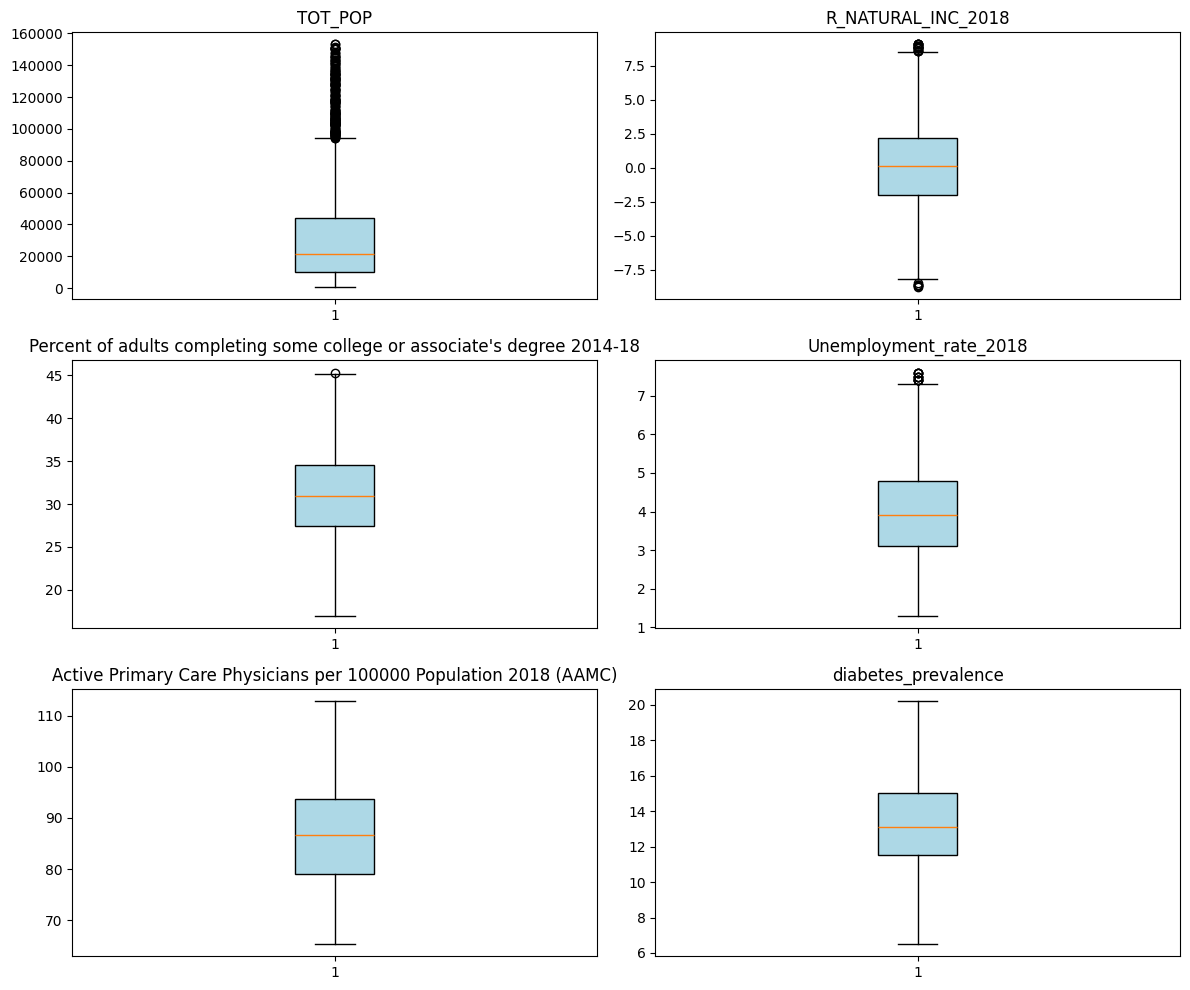

In [444]:
columns = [
    "TOT_POP",
    "R_NATURAL_INC_2018",
    "Percent of adults completing some college or associate's degree 2014-18",
    "Unemployment_rate_2018",
    "Active Primary Care Physicians per 100000 Population 2018 (AAMC)",
    "diabetes_prevalence"
]

plt.figure(figsize=(12, 10))  # más alto para acomodar varias filas
for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)  # 2 filas, 2 columnas
    plt.boxplot(df_filtrado[col],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
    plt.title(col)

plt.tight_layout()
plt.show()

In [445]:
tamano_df_reducido = len(df_reducido)
tamano_df_filtrado = len(df_filtrado)

reduccion = ((tamano_df_reducido - tamano_df_filtrado) / tamano_df_reducido) * 100
print(f"reducción de: {round(reduccion, 2)}%")


reducción de: 21.43%


Se identificaron outliers en las variables, excepto en "Active Primary Care Physicians per 100000 Population 2018 (AAMC)" y eliminandolos del dataframe se disminuye el tamano del df_reducido en   21.43%. Sin embargo, revisando la fuente que genero dicha informacion, se verifico  que la misma proviene de un estudio estadistico,  por lo que se mantendran los mismos dado que representan un fenomeno real.

Apartado de:

Regresion Lineal Tradicional,
Regresion Lineal Ridge,
Regresion Lineal Lasso


In [446]:
"""
columns = [
    "TOT_POP",
    "R_NATURAL_INC_2018",
    "Percent of adults completing some college or associate's degree 2014-18",
    "Unemployment_rate_2018",
    "Active Primary Care Physicians per 100000 Population 2018 (AAMC)",
    "Urban_rural_code",
    "diabetes_prevalence"
]
"""

'\ncolumns = [\n    "TOT_POP",\n    "R_NATURAL_INC_2018",\n    "Percent of adults completing some college or associate\'s degree 2014-18",\n    "Unemployment_rate_2018",\n    "Active Primary Care Physicians per 100000 Population 2018 (AAMC)",\n    "Urban_rural_code",\n    "diabetes_prevalence"\n]\n'

In [447]:
columns = [
    "TOT_POP",
    "R_NATURAL_INC_2018",
    "Percent of adults completing some college or associate's degree 2014-18",
    "Unemployment_rate_2018",
    "Active Primary Care Physicians per 100000 Population 2018 (AAMC)",
    "diabetes_prevalence"
]

In [448]:
#Definir las variables a predictoras y la objetivo
X = df_reducido.drop(columns="diabetes_prevalence")
y = df["diabetes_prevalence"]

In [449]:
linear_model = LinearRegression().fit(X,y)
rfe = RFECV(
estimator = linear_model,
step = 1,
cv = 5,
scoring =make_scorer(MAPE, greater_is_better=False),
                     min_features_to_select = 1
)
rfe.fit(X,y)

RFECV(cv=5, estimator=LinearRegression(),
      scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False, response_method='predict'))

In [450]:
#Evaluar cuales son las variables que mas aportan al modelo

X.columns[rfe.support_] # Para evaluar las variables resultantes del EDA

Index(['R_NATURAL_INC_2018',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Unemployment_rate_2018',
       'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Urban_rural_code'],
      dtype='object')

Caso 1. Aplicaremos normalizacion de las variables

In [451]:
#Normalizacion de las variables

transform = StandardScaler()
X_ = transform.fit_transform(X)

In [452]:
#Dividir la parte de entrenamiento y testeo.

X_train, X_test, y_train, y_test = train_test_split(X_, y ,
                                                    test_size = 0.25,
                                                    shuffle=True,
                                                    random_state=132)

In [453]:
#Regresion por el metodo de los minimos cuadrados

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Definir y ajustar OLS correctamente
OLS = sm.OLS(y_train, X_train_const)
OLS_model = OLS.fit()

# Predicciones y MSE
y_pred_OLS = OLS_model.predict(X_test_const)
mse_OLS = mean_squared_error(y_test, y_pred_OLS)

print("Error en OLS (con intercepto):", mse_OLS)


Error en OLS (con intercepto): 2.949887170118817


In [454]:
#Regresion por el metodo de Lasso

robot_lasso = Lasso(alpha=0.2, max_iter = 300)
robot_lasso.fit(X_train, y_train)
preds = robot_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, preds)

print("Error en Lasso (MSE):", mse_lasso)


Error en Lasso (MSE): 3.081393732163312


In [455]:
#Regresion por el metodo de Ridge

robot_ridge = Ridge(alpha=1000, max_iter = 100)
robot_ridge.fit(X_train, y_train)
preds = robot_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, preds)

print("Error en Ridge (MSE):", mse_ridge)


Error en Ridge (MSE): 3.263979831383043


Caso 2. Sin aplicar normalizacion de las variables

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                    test_size = 0.25,
                                                    shuffle=True,
                                                    random_state=132)

lasso_2 = Lasso(alpha=0.2, max_iter=300)
lasso_2.fit(X_train, y_train)
y_pred_lasso_2= lasso_2.predict(X_test)
mse_lasso_2 = mean_squared_error(y_test, y_pred_lasso_2)
print("MSE Lasso (sin estandarizar):", mse_lasso_2)

ridge_2 = Ridge(alpha=0.2, max_iter=300)
ridge_2.fit(X_train, y_train)
y_pred_ridge_2 = ridge_2.predict(X_test)
mse_ridge_2 = mean_squared_error(y_test, y_pred_ridge_2)
print("MSE Ridge (sin estandarizar):", mse_ridge_2)


MSE Lasso (sin estandarizar): 2.9902752292596615
MSE Ridge (sin estandarizar): 2.949888340287419


**Conclusion**

El metodo de Regresion Lasso tuvo un menor error que el metodo Ridge, por lo tanto es el que genera el menor ajuste, cuando se realiza la estandarizacion de las variables.

Ahora bien, sin aplicar normalizacion de las variables, el error es menor que el obtenido con normalizacion, aunado al hecho que se invierten las conclusiones, Ridge obtuvo el menor error.

El hecho que el error sin estandarizar sea menor, significa que en la configuracion actual de los modelos, los datos originales se ajustan mejor al modelo pero siempre es mas recomendable estandarizar porque garantiza comparabilidad y estabilidad.
